In [1]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import statsmodels.stats.proportion as proportion
import seaborn as sns

%matplotlib inline


def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi


%matplotlib inline

<IPython.core.display.Javascript object>

What kinds of variables does it have? What do they “look” like?


In [10]:
wages = pd.read_csv(r"C:\Users\GaukharJavarova\Downloads\Wages1.csv")
wages.info()
wages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exper   3294 non-null   int64  
 1   sex     3294 non-null   object 
 2   school  3294 non-null   int64  
 3   wage    3294 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 90.1+ KB


,exper,sex,school,wage
0,9,female,13,6.315296
1,12,female,12,5.479770
2,11,female,11,3.642170
3,9,female,14,4.593337
4,8,female,14,2.418157


<IPython.core.display.Javascript object>

What kinds of stories might be possible from the data?


In [8]:
wages.dtypes

exper       int64
sex        object
school      int64
wage      float64
dtype: object

<IPython.core.display.Javascript object>

find out the effect of experience on wages

In [11]:
wages["exper"].value_counts()

9     654
8     632
7     471
6     359
10    328
11    229
5     212
4     133
12    110
3      66
13     35
14     23
2      16
15     10
16      9
18      3
1       2
17      2
Name: exper, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
wages.groupby("school").count()

,exper,sex,wage
school,,,
3,1,1,1
4,2,2,2
5,5,5,5
6,14,14,14
7,24,24,24
8,86,86,86
9,161,161,161
10,399,399,399
11,661,661,661


<IPython.core.display.Javascript object>

In [14]:
wages["wage"].describe()

count    3294.000000
mean        5.757585
std         3.269186
min         0.076556
25%         3.621570
50%         5.205781
75%         7.304506
max        39.808917
Name: wage, dtype: float64

<IPython.core.display.Javascript object>

In [17]:
wages["wage"].mean()

5.757585017948695

<IPython.core.display.Javascript object>

In [40]:
min_wages = wages[wages["exper"] <= 5]
max_wages = wages[wages["exper"] >= 7]

<IPython.core.display.Javascript object>

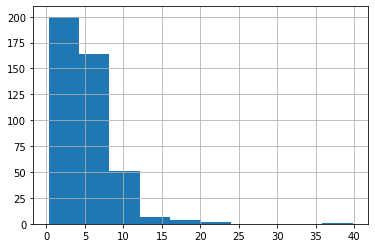

DescribeResult(nobs=429, minmax=(0.271328083, 39.8089172), mean=5.12138247139627, variance=13.51471503034432, skewness=3.0094848716053177, kurtosis=19.81667373220448)

<IPython.core.display.Javascript object>

In [41]:
min_wages["wage"].hist()
plt.show()
stats.describe(min_wages["wage"])

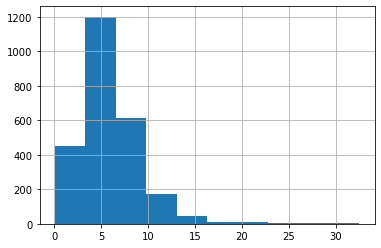

DescribeResult(nobs=2506, minmax=(0.07655561, 32.49740023), mean=5.89867605747047, variance=10.058107103763124, skewness=1.8121688995292635, kurtosis=7.739653440881531)

<IPython.core.display.Javascript object>

In [47]:
max_wages["wage"].hist()
plt.show()
stats.describe(max_wages["wage"])

<AxesSubplot:>

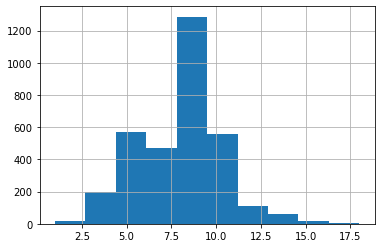

<IPython.core.display.Javascript object>

In [43]:
wages["exper"].hist()

In [54]:
min_wages[["wage", "exper"]] #use double square brackets when using two var

,wage,exper
15,8.268006,3
23,1.345654,5
24,0.751112,5
33,1.134281,5
34,9.064184,5
...,...,...
3280,1.516530,4
3284,5.790388,4
3287,2.856245,4
3288,5.512004,5


<IPython.core.display.Javascript object>

In [52]:
t, p = stats.mannwhitneyu(min_wages["wage"], max_wages["wage"])
if p < 0.05:
    print('significant difference between the two medians; reject null')
else:
    print('no significant difference; fail to reject null')


significant difference between the two medians; reject null


<IPython.core.display.Javascript object>

In [50]:
min_wages.median()

exper      4.000000
school    11.000000
wage       4.440225
dtype: float64

<IPython.core.display.Javascript object>

In [55]:
max_wages.median()

exper      9.000000
school    12.000000
wage       5.386823
dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
# can't use the ttest cuz the hist/data/skew/curtosis are not normal(can choose one of them)